<a href="https://colab.research.google.com/github/SurajSanap/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Froud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Froud Detection | ML

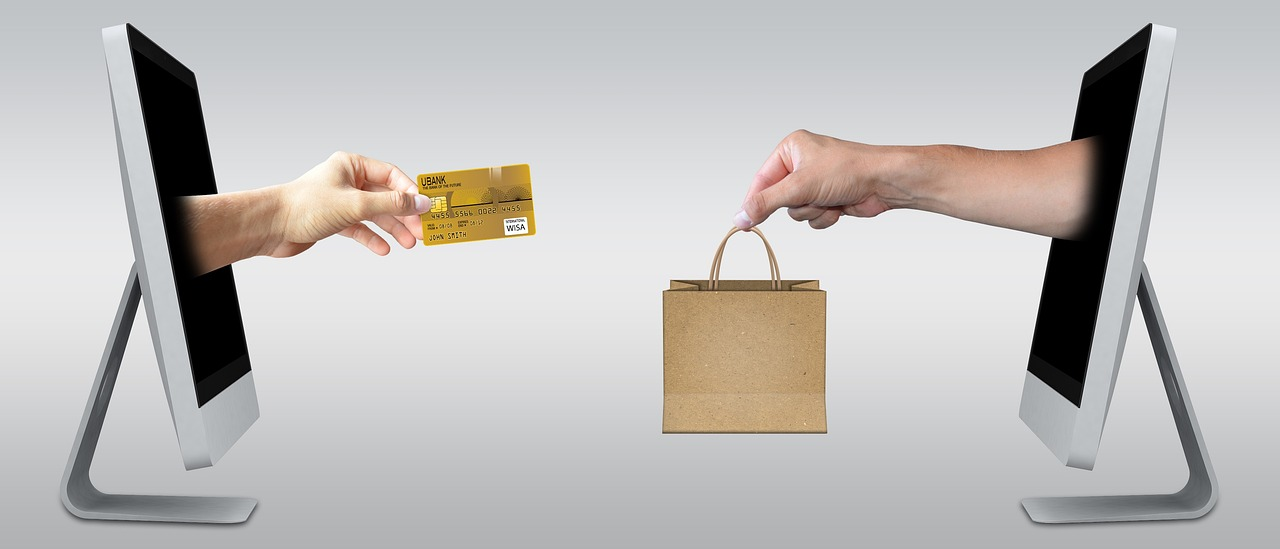

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:

cdf = pd.read_csv("/creditcard.csv")
cdf.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [32]:
cdf.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [33]:
for values in cdf:
    print(len(cdf[values].unique()))

5102
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
7824
3350
3


In [34]:
cdf.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [35]:

# Assuming 'Time' contains a mix of timestamps in seconds and 'HH:MM:SS' format
cdf["datetime"] = pd.to_datetime(cdf['Time'], errors='coerce', unit='s')
mask = cdf["datetime"].isna()  # Find rows where the conversion failed
cdf.loc[mask, "datetime"] = pd.to_datetime(cdf.loc[mask, "Time"], format='%H:%M:%S')

# Format 'datetime' column as 'HH:MM:SS'
cdf["Time"] = cdf["datetime"].dt.strftime('%H:%M:%S')

# Drop the original 'Time' column
cdf.drop(columns=['Time'], inplace=True)

# Rename the 'datetime' column to 'Time'
cdf.rename(columns={"datetime": "Time"}, inplace=True)


In [36]:
cdf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1970-01-01 00:00:00
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1970-01-01 00:00:00
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1970-01-01 00:00:01
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1970-01-01 00:00:01
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1970-01-01 00:00:02


In [37]:
cdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   V1      7973 non-null   float64       
 1   V2      7973 non-null   float64       
 2   V3      7973 non-null   float64       
 3   V4      7973 non-null   float64       
 4   V5      7973 non-null   float64       
 5   V6      7973 non-null   float64       
 6   V7      7973 non-null   float64       
 7   V8      7973 non-null   float64       
 8   V9      7973 non-null   float64       
 9   V10     7973 non-null   float64       
 10  V11     7973 non-null   float64       
 11  V12     7973 non-null   float64       
 12  V13     7973 non-null   float64       
 13  V14     7973 non-null   float64       
 14  V15     7972 non-null   float64       
 15  V16     7972 non-null   float64       
 16  V17     7972 non-null   float64       
 17  V18     7972 non-null   float64       
 18  V19     

In [38]:
# Fraud Vs No Fraud

print("NO FRAUDS ! :" , round(cdf['Class'].value_counts()[0] / len(cdf) * 100,2))
print("FRAUDS ! :" , round(cdf['Class'].value_counts()[1] / len(cdf) * 100,2))

NO FRAUDS ! : 99.67
FRAUDS ! : 0.31


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

In [40]:
X = cdf.drop(columns=["Class","Time"])
y = cdf["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.3)

Handling NAN values

In [56]:
'''
from sklearn.impute import SimpleImputer
# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_test to impute missing values
X_test_imputed = imputer.fit_transform(X_test)
'''

"\nfrom sklearn.impute import SimpleImputer\n# Create an imputer instance\nimputer = SimpleImputer(strategy='mean')\n\n# Fit and transform X_test to impute missing values\nX_test_imputed = imputer.fit_transform(X_test)\n"

In [57]:
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)

In [58]:
'''from sklearn.ensemble import HistGradientBoostingClassifier

lr = HistGradientBoostingClassifier()
lr.fit(X_train, y_train)  # Train the model
y_pred = lr.predict_proba(X_test)'''

'from sklearn.ensemble import HistGradientBoostingClassifier\n\nlr = HistGradientBoostingClassifier()\nlr.fit(X_train, y_train)  # Train the model\ny_pred = lr.predict_proba(X_test)'

In [59]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

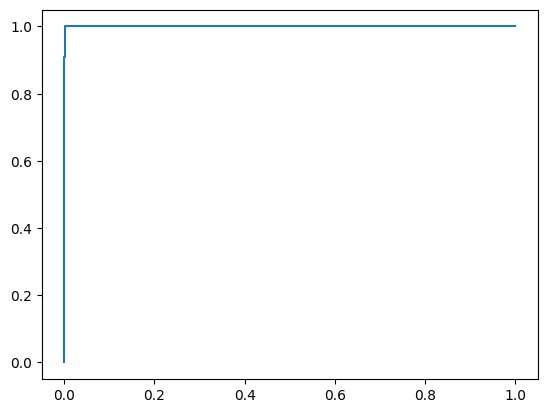

In [60]:
y_pred = lr.predict_proba(X_test)
y_pred = y_pred[:,1]
a, b, _ = roc_curve(y_test, y_pred)
plt.plot(a,b)

In [63]:
roc_auc_score(y_test, y_pred)

0.999885408708938